<a href="https://colab.research.google.com/github/dufunr/resourcealloc/blob/main/resourceallocc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer


In [2]:
data = pd.read_csv('/content/Dataset(data) (2).csv')

In [3]:
data.head(20)

,Name,Team,Skills,Interests,Experience,Past Contribution,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Badri Narayan M S,Tech,"Web Development,Python,JavaScript,Java,Fronten...","Mobile App Development, Machine Learning,Hacka...",Intermediate,"Designed websites, posters, worked on a few vi...",NaN,NaN,NaN
1,Samrakshan Badrinath,Tech,"Python, Web Development, JavaScript, Java, UI/...","Python, Cyber Security, Web Development",Intermediate,Developed webpages,NaN,NaN,NaN
2,Harshith Ashok,Tech,"Web Development, Python, Mobile App Developmen...","AI, Leadership, Project Management, Hackathons...",Intermediate,"developed websites, web apps, tools and designs",NaN,NaN,NaN
3,M Kishoreraj,Creatives,"Python, Web Development, AI,JavaScript, Conten...","Cyber Security,Web Development,AI,Design",Intermediate,"Developed websites,tools,multi-model agents",NaN,NaN,NaN
4,Sowmika Selvakumar,Creatives,"Python, Java, Machine Learning, Data Analysis,...","AI, Machine Learning, Creative Writing, Public...",Intermediate,Analysed datasets using Data Analytic Tools an...,NaN,NaN,NaN
5,Prabodh Raj U R,Creatives,"Python, C, Video Editing, Team Coordination, E...","Mobile App Development, Machine Learning, Hack...",Beginner,NIL,NaN,NaN,NaN
6,R Adhokshajan,Tech,"Python,App Development,React Native, Flutter, ...","App Development, Public Speaking",Beginner,Developed mobile apps with basic backend opera...,NaN,NaN,NaN
7,Rohith Vasagam J,Tech,"Python, Web Development, Go, Network Design an...","Cybersecurity, Web Development, ICS",Intermediate,"Developed webpages, webapps, configured multip...",NaN,NaN,NaN
8,Bhavna Roshni,Creatives,"Python, UI/UX Design, Figma, Video Editing, Te...","Web Development, AI, Hackathon, Cybersecurity,...",Intermediate,"Designed websites, posters, worked on a few vi...",NaN,NaN,NaN
9,Ritesh Kumaran S,Tech,"Javascript, Typescript, Reactjs, Nextjs, Pytho...","Full stack, AI, Design, Hackathon",Intermediate,"Designed and developed webapps, participated i...",NaN,NaN,NaN


In [4]:
data['Skills'] = data['Skills'].fillna('')
data['Interests'] = data['Interests'].fillna('')


In [5]:
data['Experience'] = data['Experience'].fillna('Unknown')


In [6]:
data = data.drop_duplicates()

In [7]:
mlb_skills = MultiLabelBinarizer()
mlb_interests = MultiLabelBinarizer()


In [8]:
data['Skills'] = data['Skills'].apply(lambda x: x.split(', ') if x != '' else [])
data['Interests'] = data['Interests'].apply(lambda x: x.split(', ') if x != '' else [])

In [9]:
skills_encoded = mlb_skills.fit_transform(data['Skills'])
interests_encoded = mlb_interests.fit_transform(data['Interests'])

In [10]:
skills_df = pd.DataFrame(skills_encoded, columns=mlb_skills.classes_)
interests_df = pd.DataFrame(interests_encoded, columns=mlb_interests.classes_)

In [11]:
skills_df = pd.DataFrame(skills_encoded, columns=[f"Skill_{col}" for col in mlb_skills.classes_])
interests_df = pd.DataFrame(interests_encoded, columns=[f"Interest_{col}" for col in mlb_interests.classes_])

In [12]:
valid_skills = set(mlb_skills.classes_)
valid_interests = set(mlb_interests.classes_)

In [13]:
le_experience = LabelEncoder()
data['Experience'] = le_experience.fit_transform(data['Experience'])

In [14]:
data_combined = pd.concat([data, skills_df, interests_df], axis=1)
data_combined = data_combined.fillna(0)
data_combined.head()

,Name,Team,Skills,Interests,Experience,Past Contribution,Unnamed: 6,Unnamed: 7,Unnamed: 8,Skill_ Leadership,...,Interest_Web Dev,Interest_Web Development,"Interest_Web Development,Ai","Interest_Web development,hackathons,cubersecurity,public speaking,hosting,photography,AI",Interest_cybersecurity,"Interest_leadership,designing,video editing",Interest_machine learning,"Interest_machine learning,cybersecurity,",Interest_photography,"Interest_web development,cyber security,cloud computing"
0,Badri Narayan M S,Tech,"[Web Development,Python,JavaScript,Java,Fronte...","[Mobile App Development, Machine Learning,Hack...",2,"Designed websites, posters, worked on a few vi...",0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Samrakshan Badrinath,Tech,"[Python, Web Development, JavaScript, Java, UI...","[Python, Cyber Security, Web Development]",2,Developed webpages,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
2,Harshith Ashok,Tech,"[Web Development, Python, Mobile App Developme...","[AI, Leadership, Project Management, Hackathon...",2,"developed websites, web apps, tools and designs",0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,M Kishoreraj,Creatives,"[Python, Web Development, AI,JavaScript, Conte...","[Cyber Security,Web Development,AI,Design]",2,"Developed websites,tools,multi-model agents",0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sowmika Selvakumar,Creatives,"[Python, Java, Machine Learning, Data Analysis...","[AI, Machine Learning, Creative Writing, Publi...",2,Analysed datasets using Data Analytic Tools an...,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print(data_combined.columns[data_combined.columns.duplicated()])

Index([], dtype='object')


In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_combined.drop(columns=['Name', 'Team', 'Skills', 'Interests', 'Past Contribution']))

In [17]:
imputer = KNNImputer(n_neighbors=5)
scaled_features = imputer.fit_transform(scaled_features)

In [40]:
kmeans = KMeans(n_clusters=15, random_state=42)
data_combined['Cluster'] = kmeans.fit_predict(scaled_features)

In [41]:
# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

In [42]:
# Create a DataFrame to store PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
data_combined['Cluster'] = kmeans.fit_predict(principal_components)
pca_df['Cluster'] = data_combined['Cluster']  # Assuming original cluster labels in 'data_combined'

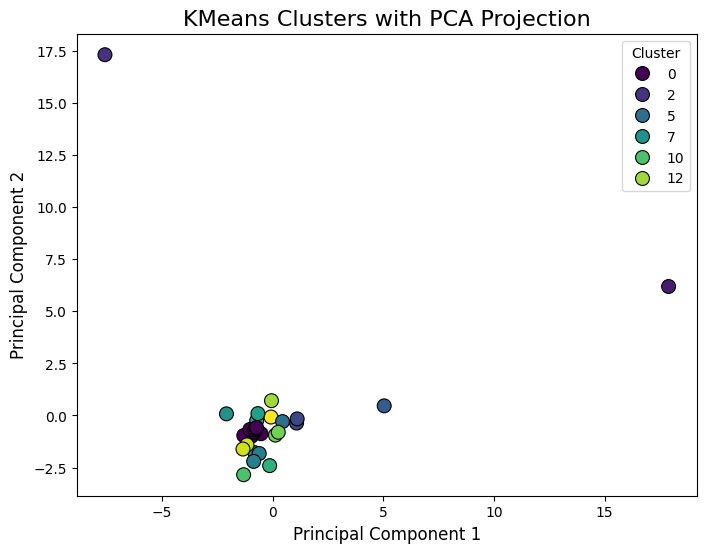

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters with PCA Projection', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

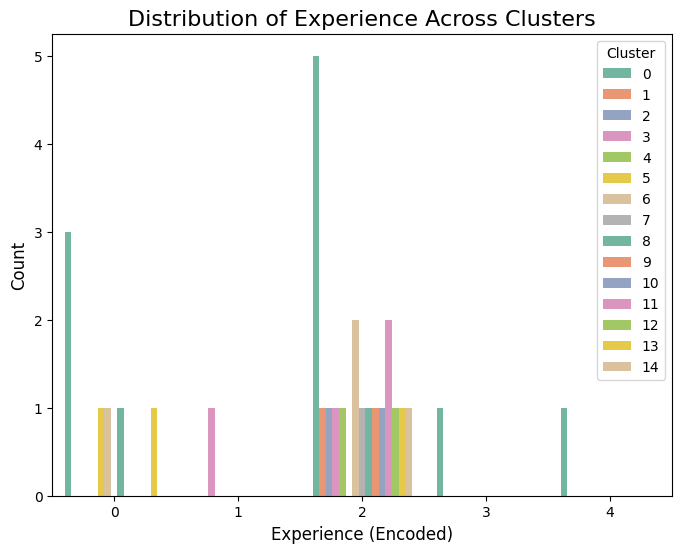

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_combined, x='Experience', hue='Cluster', palette='Set2')
plt.title('Distribution of Experience Across Clusters', fontsize=16)
plt.xlabel('Experience (Encoded)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [45]:
# Step 1: Apply KMeans clustering on PCA-transformed data with 3 clusters (based on your choice)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_components)

KMeans(n_clusters=3, random_state=42)

In [46]:
# Step 2: Calculate silhouette score for this clustering
silhouette_avg = silhouette_score(principal_components, kmeans.labels_)
print(f"Silhouette Score after PCA: {silhouette_avg:.2f}")

Silhouette Score after PCA: 0.85


In [47]:
# Step 3: Assign cluster labels to data
pca_df['Predicted_Cluster'] = kmeans.labels_

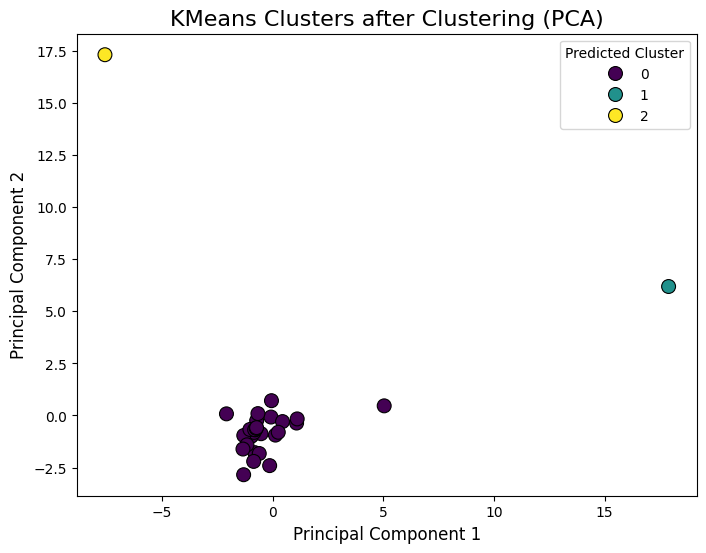

In [48]:
# Visualize the clusters after clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Predicted_Cluster', data=pca_df, palette='viridis', s=100, edgecolor='black')
plt.title('KMeans Clusters after Clustering (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Predicted Cluster')
plt.show()

In [49]:
# Step 4: Check clustering performance (using silhouette scores for different k)
silhouette_scores = []
for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(principal_components)
    silhouette_scores.append(silhouette_score(principal_components, kmeans_temp.labels_))
print(f"Silhouette Scores for Different Clusters (PCA): {silhouette_scores}")

Silhouette Scores for Different Clusters (PCA): [0.8296437038121046, 0.8486260437019322, 0.6842293594937611, 0.36284042010503903, 0.4122902309488142, 0.3744340389940409, 0.3975570694515364, 0.40310639386882047, 0.35946958529935374]


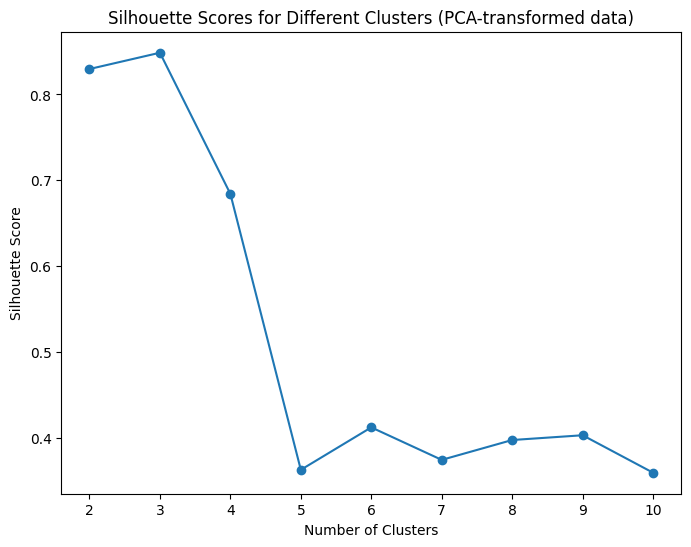

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters (PCA-transformed data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

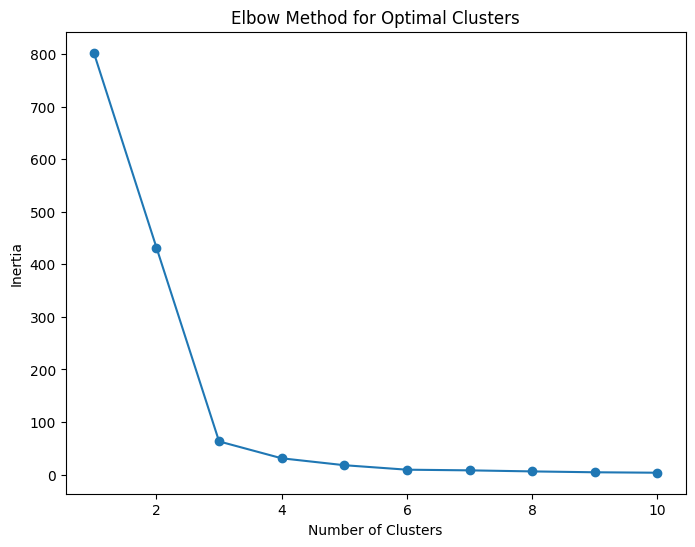

In [51]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [52]:
# Step 5: Output the predicted clusters
data_combined['Predicted_Cluster'] = kmeans.labels_

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

def allocate_task(event_name, required_skills, required_interests, required_member_count):
    # Filter required skills and interests
    required_skills = [skill for skill in required_skills if skill in valid_skills]
    required_interests = [interest for interest in required_interests if interest in valid_interests]

    if not required_skills and not required_interests:
        print("No matching skills or interests found in the data.")
        return None, 0

    # Create vectors for required skills and interests
    required_skills_vector = np.zeros(len(mlb_skills.classes_))
    required_interests_vector = np.zeros(len(mlb_interests.classes_))

    for skill in required_skills:
        required_skills_vector[mlb_skills.classes_.tolist().index(skill)] = 1

    for interest in required_interests:
        required_interests_vector[mlb_interests.classes_.tolist().index(interest)] = 1

    # Combine skills and interests vectors, giving more weight to skills
    required_features_vector = np.concatenate([required_skills_vector * 2, required_interests_vector])

    # Calculate cosine similarity between required features and member features
    member_features = data_combined[[f"Skill_{col}" for col in mlb_skills.classes_] + [f"Interest_{col}" for col in mlb_interests.classes_]].values
    similarities = cosine_similarity([required_features_vector], member_features)

    # Get indices of members sorted by similarity
    sorted_indices = similarities.argsort()[0][::-1]

    # Filter members with all required skills
    filtered_indices = [i for i in sorted_indices if all(data_combined.iloc[i][f"Skill_{skill}"] == 1 for skill in required_skills)]

    # Select suitable members based on filtered indices and required count
    if filtered_indices:
        suitable_members = data_combined.iloc[filtered_indices][:required_member_count]
    else:
        # If no perfect match, select from sorted indices (next best match)
        suitable_members = data_combined.iloc[sorted_indices][:required_member_count]
        print("Warning: No perfect skill match found. Selecting next best suitable members.")

    return suitable_members[['Name', 'Skills', 'Interests']], len(suitable_members)

In [54]:
event_name = "ML PROJECT"
required_skills = ['Data Analysis','Data Visualization']
required_interests = ['AI']
required_member_count = 2

In [55]:
suitable_members, suitable_members_count = allocate_task(event_name, required_skills, required_interests, required_member_count)
print(suitable_members)

             Name                                             Skills  \
13   A Shashmitha  [Python, Machine Learning, Data Analysis, Data...   
22  Shreya Suresh  [Python, Machine Learning, AI, Project Managem...   

                                            Interests  
13  [AI, Hackathons, Creative Writing, Project Man...  
22  [AI, Machine Learning, Photography, Project Ma...  
